In [1]:
# import the necessary Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### **1.Data exploratory**
In the following cell we perform some basic arithmetics in order to get familiar with the data, and its values.

In [2]:
# visualizing the data
data = pd.read_csv("B:\_GITHUB\Machine-Learning-project-series\social media ads analysis\dataset\social_media_ads.csv")
# print(data.head().to_markdown())
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
# check for null values
data.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
# check for basic statistics
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [5]:
# data correlation
data.corr()

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


### **2. Data visualization**
In the following cells, we will visualise the data as well as its distribution for an in deepth understanding.

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

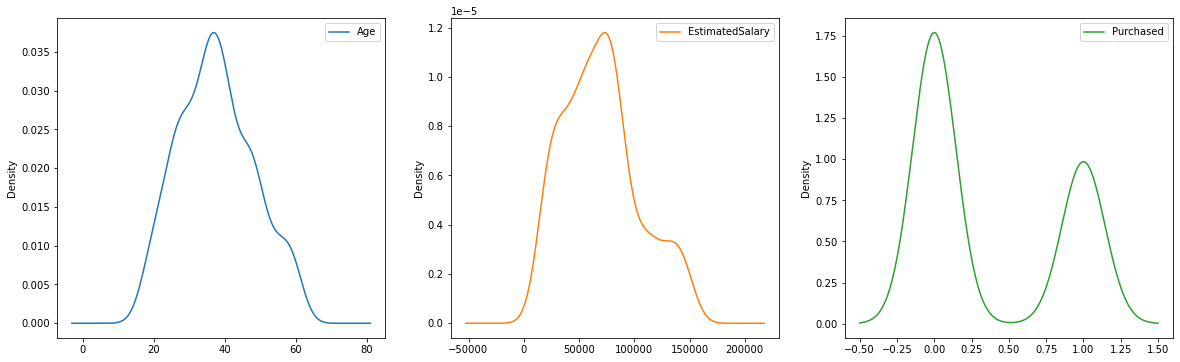

In [6]:
data.plot(kind='density', figsize=(20,20), sharex = False, layout=(3, 3), subplots=True)

<AxesSubplot:>

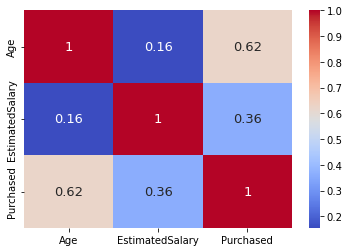

In [7]:
data_corr = data.corr()
sns.heatmap(data_corr, annot = True, cmap = 'coolwarm', annot_kws = {"size":13})

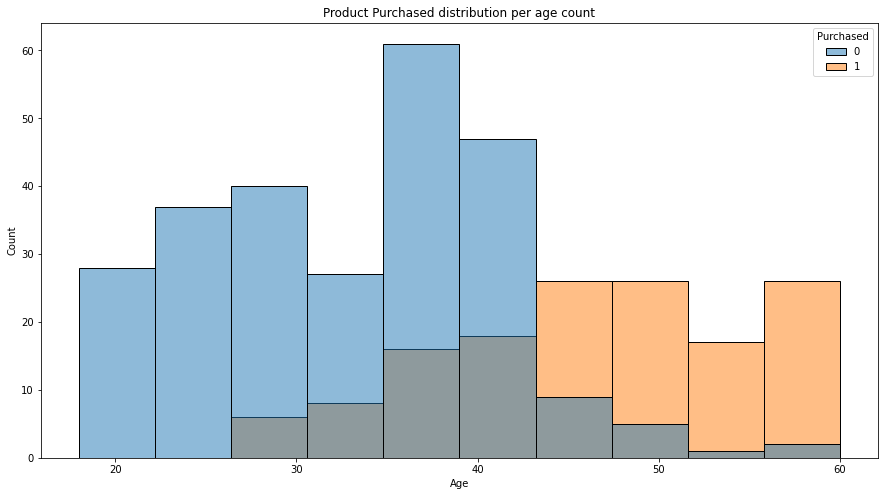

In [8]:
plt.figure(figsize=(15, 8))
plt.title("Product Purchased distribution per age count")
sns.histplot(data = data, x ="Age", hue ="Purchased")
plt.grid(False)
plt.show()

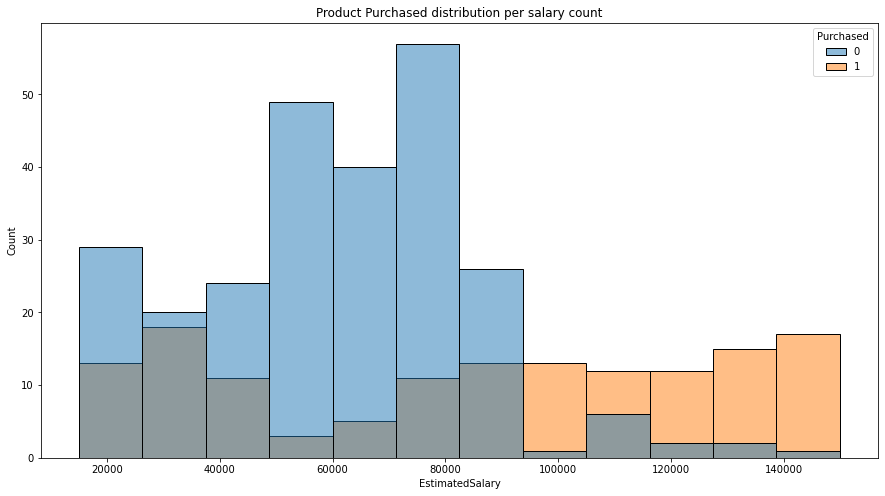

In [9]:
plt.figure(figsize=(15, 8))
plt.title("Product Purchased distribution per salary count")
sns.histplot(data = data, x ="EstimatedSalary", hue ="Purchased")
plt.grid(False)
plt.show()

### __3. Model training and evaluation__
In the following cells we are going to select some ML classification algorithms and apply to the dataset at hand. 

In [10]:
# import library
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC

In [11]:
# model implementation
X = np.array(data[['Age', 'EstimatedSalary']])
y = np.array(data['Purchased'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 23)

decision_tree = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier()
logistic_regression = LogisticRegression()
svm_classifier = SVC()
bernouilli_classifier = BernoulliNB()
passive_agressive = PassiveAggressiveClassifier()

d_t = decision_tree.fit(X_train, y_train)
knn = knn_classifier.fit(X_train, y_train)
l_r = logistic_regression.fit(X_train, y_train)
svm = svm_classifier.fit(X_train, y_train)
b_c = bernouilli_classifier.fit(X_train, y_train)
p_a = passive_agressive.fit(X_train, y_train)

data_performance = {"Classification models": ["decision_tree", "knn_classifier", "logistic_regression", "svm_classifier", "bernouilli_classifier","passive_agressive_classifier"],
                    "Model Performance" : [d_t.score(X_test, y_test), knn.score(X_test, y_test), l_r.score(X_test, y_test), svm.score(X_test, y_test), b_c.score(X_test, y_test),
                    p_a.score(X_test, y_test)]
                    }

data_performance = pd.DataFrame(data_performance)
data_performance

,Classification models,Model Performance
0,decision_tree,0.900
1,knn_classifier,0.800
2,logistic_regression,0.650
3,svm_classifier,0.775
4,bernouilli_classifier,0.650
5,passive_agressive_classifier,0.650


### __Conclusion__
By implementing the ML algorithms, we were able to perform the classification task at hand. We show the performance of each models as well as, we can see that the __Decision Tree Model__ outperforms the all models.